In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from itertools import product

/Users/alexander/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [3]:
clf1 = DecisionTreeClassifier(max_depth=4, random_state=17)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = KNeighborsClassifier(n_neighbors=3)
clf4 = KNeighborsClassifier(n_neighbors=2)
clf5 = KNeighborsClassifier(n_neighbors=1)
clf6 = RandomForestClassifier(n_estimators=10, random_state=17, max_depth=3)
clf7 = LogisticRegression(random_state=17)

In [4]:
clf1.fit(X, y);
clf2.fit(X, y);
clf3.fit(X, y);
clf4.fit(X, y);
clf5.fit(X, y);
clf6.fit(X, y);
clf7.fit(X, y);

In [5]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

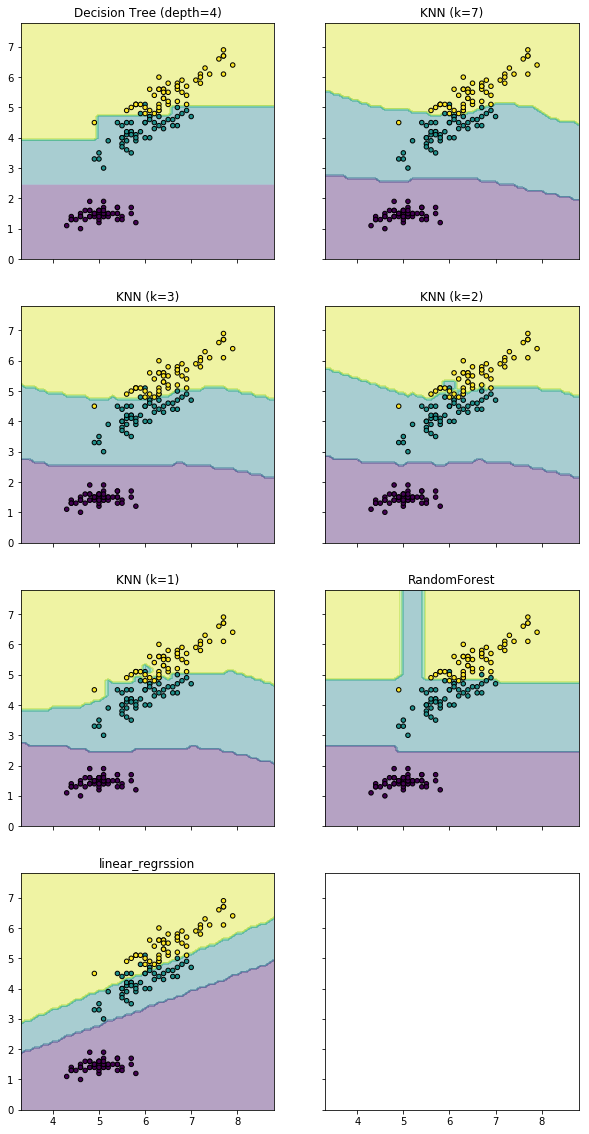

In [6]:
f, axarr = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(10, 20))

for idx, clf, tt in zip(product(range(4), [0, 1]),
                        [clf1, clf2, clf3, clf4, clf5, clf6, clf7],
                        ['Decision Tree (depth=4)', 'KNN (k=7)', 'KNN (k=3)',
                        'KNN (k=2)', 'KNN (k=1)', 'RandomForest', 
                         'linear_regrssion']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()

## Немного про метрики

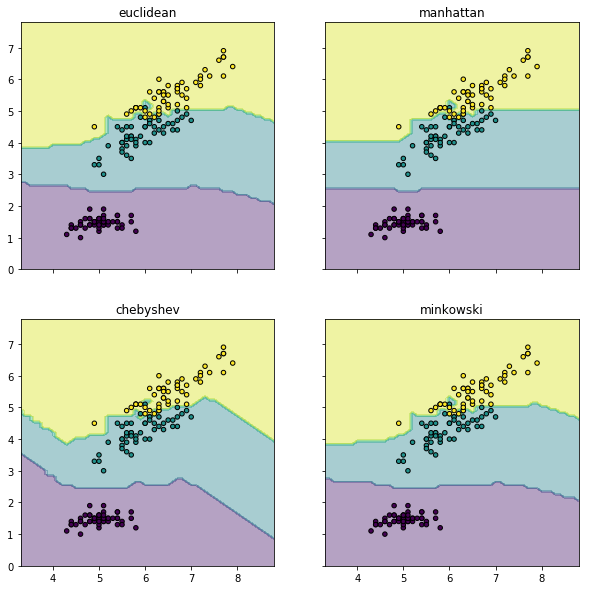

In [7]:
clf1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
clf2 = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
clf3 = KNeighborsClassifier(n_neighbors=1, metric='chebyshev')
clf4 = KNeighborsClassifier(n_neighbors=1, metric='minkowski')

clf1.fit(X, y);
clf2.fit(X, y);
clf3.fit(X, y);
clf4.fit(X, y);


f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 10))

for idx, clf, tt in zip(product(range(2), [0, 1]),
                        [clf1, clf2, clf3, clf4],
                        ['euclidean', 'manhattan', 'chebyshev', 'minkowski']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()